### <p style="text-align: right;"> &#9989; Caroline Cheng.</p>

#### <p style="text-align: right;"> &#9989; Yaqi Jie, Lyu Minda, Veziroglu Eren.</p>

# Day 12 In-class Assignment: Modeling forest fires with an Agent-based Model 

<img src="https://cdn-images-1.medium.com/max/2000/1*VO9nuzrJ9XseMyxdtPh_vg.jpeg" width=500>

## Goals of this assignment

The primary goal of this assignment is to model the spread of a forest fire using an agent-based model (ABM).  In doing so, we will:

* Use ABM to model forest fires
* Examine and quantify the concept of a "tipping point" in a model.

## Assignment instructions

Work with your group to complete this assignment. The first part of the assignment involves working out a plan for your model on the whiteboards and taking a picture of it. This picture should be uploaded to D2L along with your notebook in the Day 12 In-Class Assignment submission folder. The assignment is due at the end of class.

---
## Reviewing the motivation for the model

### Why model forest fires?

While this isn't a huge problem in Michigan, the states in the western United States having been suffering a tremendous problem with huge and difficult-to-control forest fires.  This comes from a combination of extended drought conditions, dense woodlands, and forest management policies that suppress small fires and thus ensure that large quantities of dead, dry trees and brush are available to burn when a large fire inevitably starts (typically from lighting strikes, but occasionally from negligent campers).  In recent years, this has been exacerbated by climate change, which has both caused drought conditions to be more severe and allowed tree-killing diseases and insects to flourish, which produces more dead, easily-burned wood.

These forest fires destroy ecosystems and peoples' homes and other property, and can result in the loss of human and animal life.  A key challenge in forest management is to attempt to contain these huge forest fires once they start, in order to protect human lives, settlements, and infrastructure.  To that end, it is critical to have models of how fire spreads in various conditions; see, for example, the [Open Wildland Fire Modeling group](http://www.openwfm.org/wiki/Open_Wildland_Fire_Modeling_E_community_Wiki).

More generally, the type of model that we're going to create is an example of a "percolation" model, where one substance (in this case, fire) moves through another substance (in this case, forest).  This type of problem is interesting in a variety of fields, including geology (oil or water percolating through rock, sand, or soil), human behavior (crowd movement in amusement parks), and in physics (understanding how two materials mix together).  

### What is a "tipping point"?

This model also demonstrates the concept of a "critical threshold" or a "tipping point".  This is a phenomenon that occurs when a small change in an input parameter results in a large change in outcome.  This is a phenomenon that shows up in both simple and complex models, and happens in such varied circumstances as forest fires, the spread of disease in populations, and the transfer of information within a population.

---
# A reminder of ABM forest fire behavior

As a reference, feel free to look the NetLogo version before you get started today. **DO NOT SPEND TOO MUCH TIME PLAYING WITH THIS!**

**Click this link to access the model**: [Web-based NetLogo Fire model](http://netlogoweb.org/launch#http://netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Fire.nlogo). 

**Running the model:**  The only parameter that you can vary is "density", which the fraction of cells that contain trees (and thus the density of trees in the forest).  You can drag the slider back and forth to change the density.  After you do that, click the "setup" button and then click "go".

**What do you observe?**  Try setting the "density" value to various numbers between 0 and 99, and see how the wildfire spreads.  What happens when the value is low versus when it is high?  Is there any particular value where the behavior changes very rapidly as you change the density of trees?  If so, try to home in on that number and report it below.

---
## The rules for our model

In this model, we'll create a two-dimensional square array with sides $N$ cells long that represents the forested region we're simulating.  **The cells in the array can have three values: 0 (empty), 1 (trees), and 2 (on fire).**  At the beginning of the model, a user-specified fraction of the cells $f_\text{trees_start}$ (equivalent to the NetLogo `density` parameter) are randomly filled with trees, and the remaining cells are empty.  
**One edge of the board (say, the entire leftmost column) is set on fire.**

Each cell has a "neighborhood" that is composed of its four neighbors to the left, right, above, and below it.  (Note: not the diagonal elements!)  If a cell is along one of the edges of the array, only consider the neighbors that it has, and don't try to go out of the bounds of the array!

The model takes steps forward in time, where every cell is modified based on the previous step.  **The model evolves as follows**:

* If the cell was empty last turn, it stays empty this turn.
* If the cell is a tree and any of its neighbors were on fire last turn, it catches on fire.
* If the cell was on fire last turn, the fire has consumed all of the trees and it is now empty.

The model evolves forward in time until all of the fires have burned out.  After this happens, you can calculate the fraction of the cells that still have trees at the end of the model ($f_\text{trees_end}$) and the fraction of cells that are empty ($f_\text{empty}$).  The fraction of burned cells, $f_\text{burned}$, is just the difference between the fraction of cells that were initially trees and the fraction of cells that are trees at the end of the model; in other words,

$f_\text{burned} = f_\text{trees_end} - f_\text{trees_start}$



## Your mission:

Your mission is to answer the question: "How does the spread of fire relate to the density of the forest?"  
More precisely, we're asking "How does $f_\text{burned}$ depend on $f_\text{trees_start}$?"

To achieve this mission, we will break this down into two stages:

---
### Stage 1:  Planning your solution
As a group create pseudocode on the whiteboards that shows how you plan to implement this model for an arbitrary value of $f_\text{trees_start}$.  Make sure that you think about how to set up the initial conditions, how to evolve the model, and how to calculate the fraction of trees and empty cells that remain in the end.  Use the whiteboard and make sure to take a picture of it. **You must turn in the picture along with your notebook.**

**Important**: Make sure you discuss how you will handle cells that are on the boundaries of your 2D board!

**Do not spend more than 15 minutes on this part of the activity!**
___

### Stage 2: Implementing your solution

Now we're going to work through a combination of provided code and code that you have to write. The goal is to have a functioning forest fire model by the end of class!

**Make sure to execute the following cell of imports before you move on!**

In [1]:
# standard includes
import numpy as np
import numpy.random as rand
%matplotlib inline
import matplotlib.pyplot as plt

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time  

### First important Function: Plotting the grid!

Take a look at the `plotgrid` function. You were given a similar one in your pre-class assignment. We'll be using this code a lot for displaying your forest, so we want to make sure you understand it. **Fill in the comments to explain what the code is doing.**

In [9]:
# Function plotgrid() does what??

def plotgrid(myarray):
    
    # 
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0])
    
    # 
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    #x_indice=all the possible value of x
    #y_indice=all the possible value of y
    
    # 
    tree_x = x_indices[myarray == 1];   
    tree_y = y_indices[myarray == 1]; 
    fire_x = x_indices[myarray == 2];   
    fire_y = y_indices[myarray == 2]; 
    #tree_x = x axis of tree   
    #tree_y = y axis of tree
    #fire_x = x position of the fire
    #fire_y = y position of the fire
    # 
    plt.plot(tree_x, myarray.shape[0] - tree_y - 1, 'gs',markersize=10)   
    plt.plot(fire_x, myarray.shape[0] - fire_y - 1, 'rs',markersize=10)  
    # plot x position set color of the tree and fire
    # 
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 
    #plot x and y position of fire and tree, don't plot negative number
    # 
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)


### Initializing the forest

Before you can run a forest model, you need to initialize you board. You should have already done this in your pre-class assignment, so we're providing the following code for you. **Take a look at it and make sure you understand it. How does it compare to the code that you wrote?**

In [24]:
def set_board(board_size=50,f_trees_start=0.5):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64') #initialize the area of the forest
    
    # loop over board and roll the dice; if the random number is less
    # than f_trees_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if rand.random() <= f_trees_start:
                game_board[i,j] = 1
        #define 

    # set the whole left edge of the board on fire. We're arsonists!
    game_board[:,0] = 2
    
    return game_board

#### Important step! Test the functions above and make sure they work! 

Does the fire show up in the places you want? Does the tree fraction or board size change accordingly when you change the input parameters? Would you make any modifications to plot grid that you think would improve the visualization? What happens if you make the board size much larger than the default? If can think of ways to improve `plotgrid`, feel free to make those changes! 

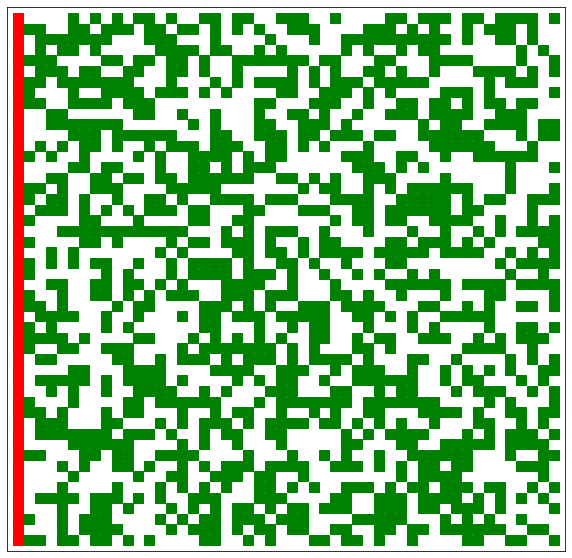

In [33]:
# put your test code here. Make a plot to check it.
# we're going to define a default figure size for you to make things look nice
myarrary=set_board(board_size=50,f_trees_start=0.5)
fig = plt.figure(figsize=(10,10))
plotgrid(myarrary)

## The main event: make the fire spread!

Clearly the most import part of an agent-based model is figuring out how your agents should behave in your simulation. In this model, the main agent you have to deal with is the fire. Your job is to write the function that controls how the fire moves. The skeleton function provided below takes in the current board, defines a new board, and then returns that new board where the positions of the fire have been updated. The function contains comments to suggest the steps that you need to implement to make it work. **Work with your group to make this function functional!** 

To avoid needless scrolling here are the rules of the model again:

> Each cell has a "neighborhood" that is composed of its four neighbors to the left, right, above, and below it.  (Note: not the diagonal elements!)  If a cell is along one of the edges of the array, only consider the neighbors that it has, and don't try to go out of the bounds of the array!

>The model takes steps forward in time, where every cell is modified based on the previous step.  **The model evolves as follows**:

>* If the cell was empty last turn, it stays empty this turn.
>* If the cell is a tree and any of its neighbors were on fire last turn, it catches on fire.
>* If the cell was on fire last turn, the fire has consumed all of the trees and it is now empty.

**Recommendation**: Use the `getNeighborValues()` from the last class period to simplify your code! One possible version has been included below.

In [69]:
# Function to check if a given set of i,j index values are valid
def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

# Function to return all of the neighbor values for a given i,j location
def getNeighborValues(i,j, board):
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0], neighbor[1], board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighbor_values

# Function for advancing the game board ONE step
def advance_board(game_board):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    
    # create a new array that's just like the original one, but initially set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
    
    # loop over each cell in the board and decide what to do.
    for i in range(len(new_board)):
        for j in range(len(new_board[i])):
       
    
            
    
            
    
 
    # You'll need two loops here, one nested inside the other.
  
            # Now that we're inside the loops we need to apply our rules
      
            # if the cell was empty last turn, it's still empty.
            if game_board[i][j] == 0:
                new_board[i][j]==0
            # if it was on fire last turn, it's now empty.
            if game_board[i][j] == 2:
                new_board[i][j]==0
    
            # now, if there is a tree in the cell, we have to decide what to do
            if game_board[i][j] == 1:
                neighbor=getNeighborValues(i,j, game_board)
                
                # initially make the cell a tree in the new board
                new_board[i][j]==1
                for position in neighbor:
                # If one of the neighboring cells was on fire last turn, 
                    if position==2:
                        new_board[i,j]=0
                         break
                # this cell is now on fire!
                # (make sure you account for whether or not you're on the edge!)
                

    # return the new board
    return new_board

IndentationError: unexpected indent (<ipython-input-69-28603fc6a721>, line 61)

#### As good coders, we always test our new functions! Test your function above and make sure it works! 

Run the code a few times to see whether fire advances according to the rules. You can start with any sort of initial board that you want, you can even just use the default board for the purpose of testing.

In [66]:
# Initialize a new board here
game_board=set_board(board_size=50,f_trees_start=0.5)
#getNeighborValues(i,j, game_board)
advance_board(game_board)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [64]:
# Test your new advance_board function here. Make a plot to check it. 
# Run this cell several times to make sure the fire continues to advance.

# Again, we set the figure size for you

fig = plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

## Analyzing the state of the board

As we run our model, we want to know what fraction of the board is empty and what fraction is covered with trees. You need to add code to compute these values. A bit of skeleton code is provided for you to help guide your coding efforts.

In [ ]:
def calc_stats(game_board):
    '''
    Calculates the fraction of cells on the game board that are 
    a tree or are empty.
    
    Input: a game board
    
    Output: fraction that's empty, fraction that's covered in trees.
    '''
    
    # use numpy to count up the fraction that are empty
    frac_empty = 

    # do the same for trees
    frac_tree = 
    
    # return it!
    return frac_empty, frac_tree



### Putting it all together!

The following code takes all of the above functions and puts them in order along with some animation code so that you can see your fire spread. If your functions above were written correctly, this could should *just work*. **Comment the code to indicate that you know what its doing!**

NameError: name 'a' is not defined

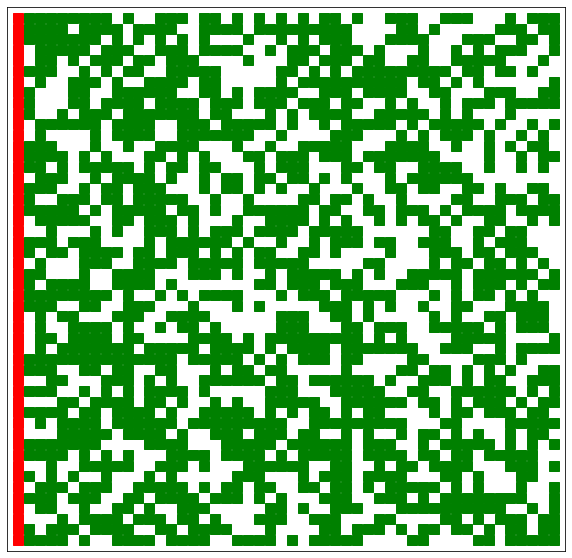

In [25]:
# 
f_trees_start=0.6
board_size = 50

#
fig = plt.figure(figsize=(10,10))

# 
game_board = set_board(board_size=board_size, f_trees_start=f_trees_start)

# 
plotgrid(game_board)

# 
on_fire = True

# 
while on_fire == True:

    # 
    game_board = advance_board(game_board)
    
    # 
    plotgrid(game_board)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    fig.clear()

    # 
    frac_empty, frac_trees = calc_stats(game_board)

    # 
    if frac_empty + frac_trees == 1.0:
        on_fire = False

# 
plt.close()               

#### Follow up task:
Demonstrate that it works on a model board 50 cells on a side for a few values of $f_\text{trees_start}$; say, 0.25, 0.5, 0.75, and 1.0.  

####  Question:
Do you notice any differences in behavior as you change $f_\text{trees_start}$? Put down your answer in the cell below.


### Stage 3: Finding the tipping point 

In order to find the tipping point, i.e. the point at which the fire spreads much more substantially, we want to loop over many values of $f_\text{trees_start}$ (say, values from 0.01 to 1.0, in steps of 0.01) and run the model many times.  If we keep track of the fraction of cells that are burned for each starting condition, we can show how $f_\text{burned}$ and $f_\text{trees_start}$ relate to each other. 



**The code below is incomplete, fill the missing code to below to make a plot to observe where the tipping point occurs**

In [ ]:
board_size = 50

f_tree = []
f_burned = []

for tree_fraction in 
    
    # Complete this line
    game_board = 

    on_fire = True
    while on_fire == True:
        # Complete this line
        game_board = 
        
        # Complete this line
        frac_empty, frac_trees = 
        if frac_empty + frac_trees == 1.0:
            # Complete this line
            on_fire = 

    f_tree.append(tree_fraction)
    f_burned.append(frac_empty - (1.0-tree_fraction))
    

plt.plot(f_tree, f_burned)
plt.xlabel("tree fraction")
plt.ylabel("burned fraction (normalized)")



#### Follow up task:

Describe the model's behavior.  Do you observe a "tipping point" in $f_\text{burned}$? That is, is there an abrupt change in behavior in $f_\text{burned}$ as you increase $f_\text{trees_start}$?  Does it agree with what you saw when you were experimenting with the NetLogo model?

*put your answer here!*


---
### Exploring new initial conditions

So far, we have been setting up fire from the edge of the forest. If you set the fire in the middle row of the forest, does this change the where the tipping point occurs? (Copy and modify the code below and also put down your observations in a Markdown cell.)

---
### If time allows...

Brainstorm with your group (and Google) what this agent-based models may be good for (other than forest fires). Write down your answer in a Markdown cell below. 

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook and the pictures of your model planning session to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the submission link for Day 12, and upload everything there. Make sure your name is on it!

&#169; Copyright 2018,  Michigan State University Board of Trustees